In [1]:
import pandas as pd #This module is used to read the csv files and store in the dataframe
import numpy as np  #This module is used for numerical column checking and counting
import seaborn as sns   #This module is used to visualize the data provided
import matplotlib.pyplot as plt #This module prints out the visualized data
from sklearn.preprocessing import StandardScaler     #The StandardScaler module is used to scale data needed for testing and training
from sklearn.preprocessing import LabelEncoder  #This module is used to convert categorical values into numerical columns for preprocessing
from sklearn.model_selection import train_test_split    #This module is used for data testing
from sklearn.linear_model import LogisticRegression  #This module is used to predict discrete categorical values
from sklearn.ensemble import RandomForestClassifier #This module is used for learning methods for classification, regression and it operates by constructing a multitude of decision trees at training time 
from sklearn.svm import SVC #It contains SVM(Support Vector Machine) and finds the hyperplane that best separates the data points into different classes.
from sklearn.metrics import accuracy_score #This module checks for accuracy of imported algorithms

In [2]:
data=pd.read_csv("C:/Users/kaust/OneDrive/Desktop/AIML ADG/Salaries/global_ai_ml_data_salaries.csv")

In [3]:
#Data Description
print(data.head())  #Prints out first five row values

   work_year experience_level employment_type                 job_title  \
0       2024               MI              FT     Business Intelligence   
1       2024               MI              FT     Business Intelligence   
2       2024               SE              FT              BI Developer   
3       2024               SE              FT              BI Developer   
4       2024               SE              FT  Machine Learning Modeler   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   84021             USD          84021                 CA             0   
1   69000             USD          69000                 CA             0   
2  241600             USD         241600                 US             0   
3  109800             USD         109800                 US             0   
4  245400             USD         245400                 US           100   

  company_location company_size  
0               CA            M  
1               CA

In [4]:
print(data.tail())  #Prints out last five row values

       work_year experience_level employment_type                 job_title  \
19770       2020               SE              FT            Data Scientist   
19771       2021               MI              FT  Principal Data Scientist   
19772       2020               EN              FT            Data Scientist   
19773       2020               EN              CT     Business Data Analyst   
19774       2021               SE              FT            Data Scientist   

        salary salary_currency  salary_in_usd employee_residence  \
19770   412000             USD         412000                 US   
19771   151000             USD         151000                 US   
19772   105000             USD         105000                 US   
19773   100000             USD         100000                 US   
19774  7000000             INR          94665                 IN   

       remote_ratio company_location company_size  
19770           100               US            L  
19771       

In [5]:
print(data.shape)  #Prints out no of rows and columns

(19775, 11)


In [6]:
print(data.describe())  #Prints out the statistical data such as count,mean etc for data have integer values

          work_year        salary  salary_in_usd  remote_ratio
count  19775.000000  1.977500e+04   19775.000000  19775.000000
mean    2023.353527  1.628728e+05  150935.295322     29.886220
std        0.712468  3.128112e+05   68561.127186     45.427765
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.039770e+05  103200.000000      0.000000
50%     2023.000000  1.430000e+05  142200.000000      0.000000
75%     2024.000000  1.900000e+05  189650.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000


In [7]:
print(data.info())  #Prints out the the column heads, the no of values it has stored along with the data type present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19775 entries, 0 to 19774
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           19775 non-null  int64 
 1   experience_level    19775 non-null  object
 2   employment_type     19775 non-null  object
 3   job_title           19775 non-null  object
 4   salary              19775 non-null  int64 
 5   salary_currency     19775 non-null  object
 6   salary_in_usd       19775 non-null  int64 
 7   employee_residence  19775 non-null  object
 8   remote_ratio        19775 non-null  int64 
 9   company_location    19775 non-null  object
 10  company_size        19775 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.7+ MB
None


In [8]:
print(data.nunique())  #Prints out the amount of data that is unique in each column

work_year                5
experience_level         4
employment_type          4
job_title              148
salary                2925
salary_currency         24
salary_in_usd         3319
employee_residence      88
remote_ratio             3
company_location        78
company_size             3
dtype: int64


In [9]:
#Data Cleaning
print(data.isnull().sum(),"\n")  #Prints out missing values of data
numeric_columns = data.select_dtypes(include=[np.number]).columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())  # Fill numeric columns with their mean

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64 



In [10]:
print(data.duplicated().sum(),"\n")  #Prints out duplicated values
categorical_columns = data.select_dtypes(include=[object]).columns
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col]) # Encodes the categorical variables by using LabelEncoder

8261 



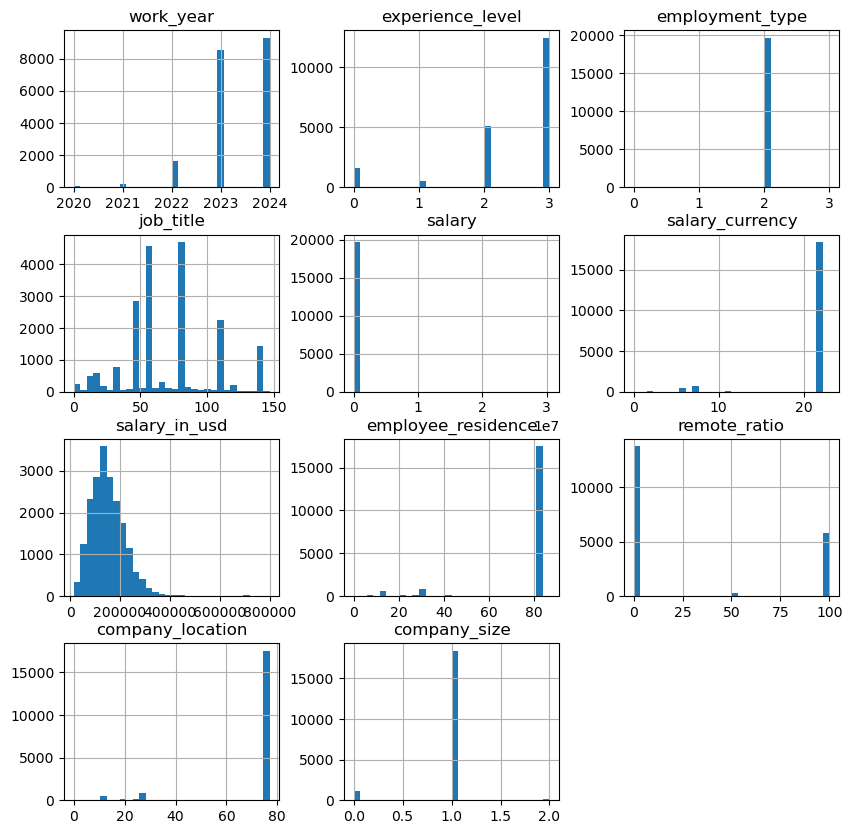

In [11]:
#Data Visualization
data.hist(bins=30, figsize=(10, 10))
plt.show()  #Prints out histogram of data

C:\Users\kaust\AppData\Local\Temp\ipykernel_151600\391358003.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)
C:\Users\kaust\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


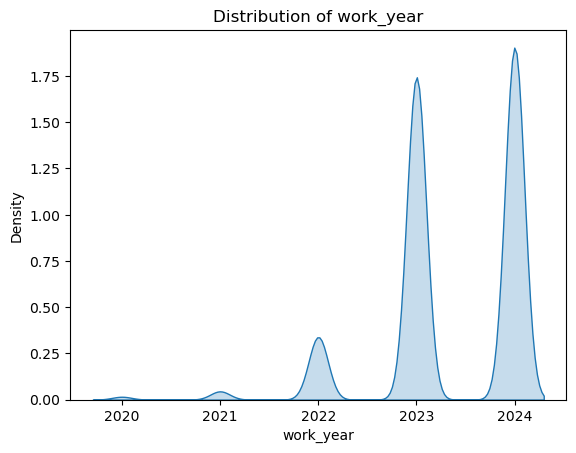

C:\Users\kaust\AppData\Local\Temp\ipykernel_151600\391358003.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)
C:\Users\kaust\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


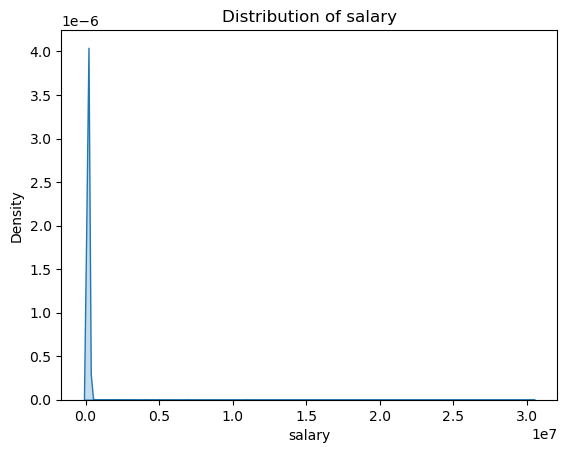

C:\Users\kaust\AppData\Local\Temp\ipykernel_151600\391358003.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)
C:\Users\kaust\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


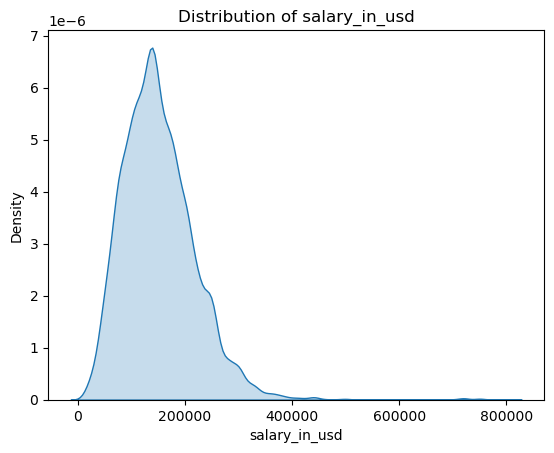

C:\Users\kaust\AppData\Local\Temp\ipykernel_151600\391358003.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True)
C:\Users\kaust\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


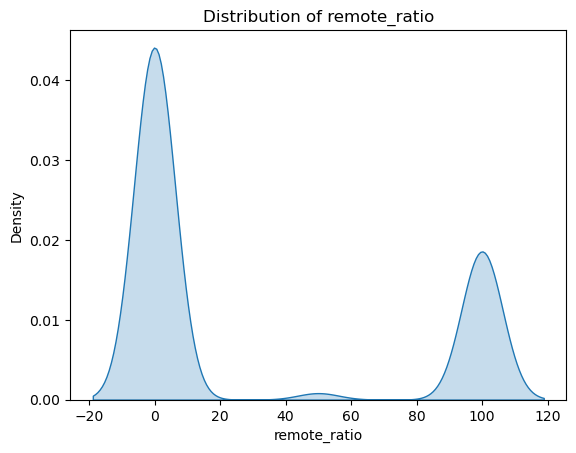

In [12]:
for column in numeric_columns:
    sns.kdeplot(data[column], shade=True)
    plt.title(f'Distribution of {column}')
    plt.show()  #Prints out KDE Plots

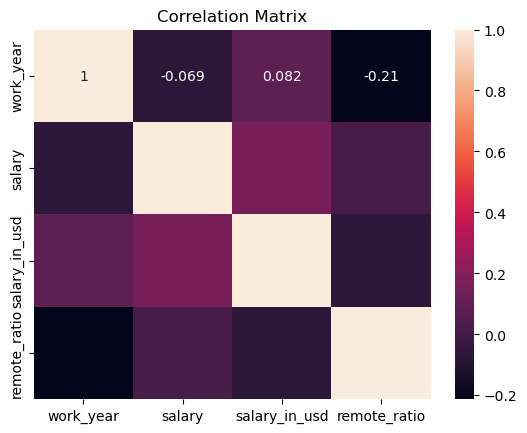

In [13]:
numeric_data = data[numeric_columns]
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns,yticklabels=correlation_matrix.columns,annot=True)
plt.title('Correlation Matrix')
plt.show()  #Prints out a heatmap by using correlation matrix

In [14]:
#Data Testing and preprocessing
X=data.drop('company_size',axis=1) #This is the feature matrix and it contains all the independent variables needed for model training, excluding the target variable.
y=data['company_size']  #This is the target variable which will be used as dependent variable for the machine learning model.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [15]:
sc_X=StandardScaler()   #Used to standardize data by making mean=0 and standard deviation=1
X_train=sc_X.fit_transform(X_train) #Method used to do the standardization
X_test=sc_X.transform(X_test)  #Secondary method

In [16]:
print(X_train,"\n") #Used to print out the standardized data
print(X_test)

[[-0.49541184  0.63352107  0.01494919 ...  0.34286521 -0.65460647
   0.34064834]
 [ 0.90549212  0.63352107  0.01494919 ...  0.34286521 -0.65460647
   0.34064834]
 [-0.49541184  0.63352107  0.01494919 ... -2.51144714 -0.65460647
  -2.54784655]
 ...
 [-0.49541184 -0.47914989  0.01494919 ...  0.34286521  1.55247207
   0.34064834]
 [-0.49541184 -2.70449181  0.01494919 ...  0.34286521 -0.65460647
   0.34064834]
 [ 0.90549212  0.63352107  0.01494919 ...  0.34286521 -0.65460647
   0.34064834]] 

[[-0.49541184 -1.59182085  0.01494919 ...  0.34286521 -0.65460647
   0.34064834]
 [-0.49541184  0.63352107  0.01494919 ...  0.34286521 -0.65460647
   0.34064834]
 [-0.49541184  0.63352107  0.01494919 ...  0.34286521 -0.65460647
   0.34064834]
 ...
 [-1.89631579 -1.59182085  0.01494919 ...  0.34286521  1.55247207
   0.34064834]
 [ 0.90549212  0.63352107  0.01494919 ...  0.34286521 -0.65460647
   0.34064834]
 [-0.49541184  0.63352107  0.01494919 ...  0.34286521 -0.65460647
   0.34064834]]


In [17]:
#Model Training using Machine Learning Algorithms
#1 Logistic Regression
logR=LogisticRegression(random_state=0)
logR.fit(X_train,y_train) #This is used to fit logistic results into test dataset
y_pred_logR = logR.predict(X_test)
accuracy_logR = accuracy_score(y_test, y_pred_logR) #Accuracy check for Logistic Regression

In [18]:
#2 Random Forest
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)    #This is used to fit randomforest results into test dataset
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf) #Accuracy check for random forest

In [19]:
#3 Support Vector Machine
svm_clf = SVC(random_state=0)
svm_clf.fit(X_train, y_train)   #This is used to fit SVM results into test dataset
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)   #Accuracy check for SVM

In [20]:
print("Accuracy of Logistic Regression:", accuracy_logR)
print("Accuracy of Random Forest:", accuracy_rf)
print("Accuracy of Support Vector Machine:", accuracy_svm)

Accuracy of Logistic Regression: 0.9355279126213593
Accuracy of Random Forest: 0.9605582524271845
Accuracy of Support Vector Machine: 0.9371966019417476


In [21]:
'''
Accuracy of Logistic Regression: 0.9356796116504854
Accuracy of Random Forest: 0.9605582524271845
Accuracy of Support Vector Machine: 0.9371966019417476

It can be observed for the given csv file name global_ai_ml_data_salaries.csv, 
random forest has the best accuracy and should be the recommended machine learning algorithm for the dataset.
'''

'\nAccuracy of Logistic Regression: 0.9356796116504854\nAccuracy of Random Forest: 0.9605582524271845\nAccuracy of Support Vector Machine: 0.9371966019417476\n\nIt can be observed for the given csv file name global_ai_ml_data_salaries.csv, \nrandom forest has the best accuracy and should be the recommended machine learning algorithm for the dataset.\n'